In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

These are brief notes only.

## The Complex Step Derivative in Python
---

Consider a real-valued function $f(x)$ in the complex variable $z$. Taking a small step $ih$, the usual Taylor expansion yields

$$ 
    f(x+ih) = \sum_{n=0}^\infty \frac{(ih)^n}{n!}f^{(n)}(x) = f(x) + ihf'(x) - \frac{h^2}{2}f''(x) - i\frac{h^3}{6}f^{(3)}(x) + \dots,
$$

and after dividing by $h$ and taking only the imaginary part we have

$$
    \frac{\mathrm{Im}[f(x + ih)]}{h} = f'(x) + \mathcal{O}(h^2).
$$

Courtesy of Squire and Trapp, 1998. This approximation is $\mathcal{O}(h^2)$ with only one function evaluation, and importantly, is *not* subject to subtractive cancellation error (catastrophic cancellation).

**Example (a).** (Squire and Trapp, 1998) Let $f(x) = x^{9/2}$ and consider $x_0 = 1.5$. The value of the derivative at this point, to seventeen decimals places, is
$$
    f'(1.5) = 18.600812734259759.
$$

The standard forward-difference approximation, the centered difference approximation, and the complex-step approximation will be compared. The imaginary part is taken using NumPy's `imag()` method. The literal `j` represents $i$.

In [2]:
def f(x):
    return x**(9/2)

def f_prime_exact(x):
    return (9/2) * x**(7/2)

def forward_diff(f, x, h):
    """
    Standard forward-difference derivative approximation
        f'(x) ~= (f(x+h) - f(x)) / h .
    """

    return (f(x + h) - f(x)) / h

def centred_diff(f, x, h):
    """
    Standard centred difference derivative approximation
        f'(x) ~= (f(x+h) - f(x-h)) / (2h) .
    """

    return (f(x + h) - f(x - h)) / (2 * h)

def complex_step(f, x, h):
    """
    Complex-step derivative approximation
        f'(x) ~= Im(f(x + i h)) / h .
    """

    return np.imag(f(x + 1j * h)) / h

Consider $h = 10^{-k}$ for $k = 1, 2, \dots, 20$. We expect the standard forward and centred difference approximations to start producing error from $h \approx 10^{-8}$, and for the complex-step derivative to *not* exhibit this behaviour.

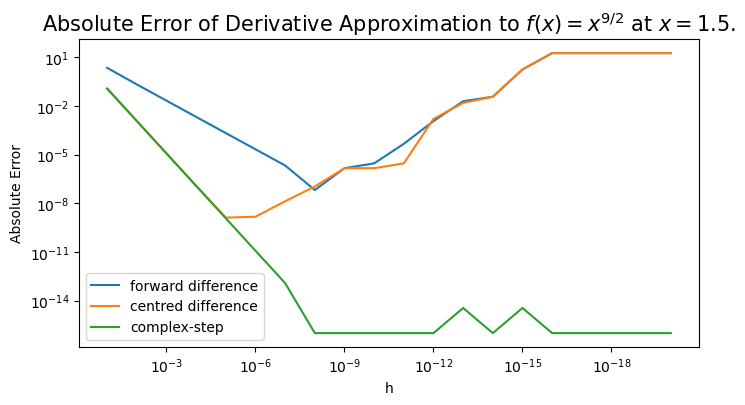

In [ ]:
def compute_approx(f, x0, k_max):
    ''' 
    Computes the derivative f'(x0) using the forward difference, centred difference, and complex step
    for h = 10^{-k}, k = 1, 2, ..., k_max.
    '''

    hs = np.array([10**(-k) for k in range (1, k_max + 1)])

    N = len(hs)
    forward_approx = np.ones(N)
    centred_approx = np.ones(N)
    complex_approx = np.ones(N)

    for i, h in enumerate(hs):
        forward_approx[i] = forward_diff(f, x0, h)
        centred_approx[i] = centred_diff(f, x0, h)
        complex_approx[i] = complex_step(f, x0, h)

    return hs, forward_approx, centred_approx, complex_approx

x0, k_max, = 1.5, 20
f_exact = f_prime_exact(x0)
hs, forward_approx, centred_approx, complex_approx = compute_approx(f, x0, k_max)

forward_error = np.abs(forward_approx - f_exact)
centred_error = np.abs(centred_approx - f_exact)
complex_error = np.abs(complex_approx - f_exact)

# Manually adjust complex error so it appears on graph.
complex_error_adjusted = np.maximum(complex_error, 1e-16)

# Plot all three errors against h on the same plot, use log-log for better scaling.
fig, ax = plt.subplots(figsize = (8, 4))
ax.loglog(hs, forward_error, label = "forward difference")
ax.loglog(hs, centred_error, label = "centred difference")
ax.loglog(hs, complex_error_adjusted, label = "complex-step")
ax.set_xlabel("h")
ax.set_ylabel("Absolute Error")
ax.legend(loc = "best")
ax.set_title("Absolute Error of Derivative Approximation to $f(x) = x^{9/2}$ at $x = 1.5$.", fontsize = 15)


plt.gca().invert_xaxis()
# plt.savefig("complex-step-bigTitle.pdf", format = "pdf")
plt.show()

In [ ]:
# Comparison of values.
f_df = pd.DataFrame({
    "h": hs,
    "forward_approx": forward_approx,
    "centred_error": centred_approx,
    "complex_error": complex_approx
})

# Uncomment if wanted.
# f_df

#### Another Perspective with the Cauchy-Riemann equations.
Consider an analytic function $f = u + iv$ of the complex variable $z = x + iy$. Since $f$ is analytic, the Cauchy-Riemann equations hold such that

\begin{align}
    \partial_x u &= \partial_y v,\\
    \partial_y u &= -\partial_x v.
\end{align}

The derivative $\partial_y v$ is necessarily well defined because $f$ is analytic. Using the definition of the derivative, (1) becomes
$$
    \partial_x u = \lim_{h\rightarrow 0}\frac{v(x+i(y+h)) - v(x+iy)}{h}.
$$

Now suppose $f$ is a real-valued function of real variables. Then $y = 0$, $v(x) = 0$, and $f'(x) = \partial_x u$. Hence
$$
f'(x) = \lim_{h\rightarrow 0}\frac{v(x+ih)}{h} = \lim_{h\rightarrow 0}\frac{\mathrm{Im}[f(x+ih)]}{h}.
$$

#### Advantages and Challenges
The main advantanges of the complex-step derivative are that (a) it is still incredibly simple to implement (like the standard forward difference), (b) has a reasonable approximation error $\mathcal{O}(h^2)$, and most importantly (c) does not encounter 'catastrophic cancellation'.

However, it is inherently more expensive (at least $2\times$ number of FLOPs) because it uses complex arithmetic.

### References

Squire, W. and G. Trapp (1998). “Using complex variables to estimate deriva-
tives of real functions”. In: SIAM Review 40.1.